## Introduction
This data set covers a domain for exercising the Finance and Housing data set.  The data contains information from the 1990 California census. This data set has 10 types of metrics such as the population, median housing prices, income, location etc. for each block group in the state of California. Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset. 

# AIM
#### Purpose of this notebook to run Exploratory Data Analysis (EDA) using different tools

# Load Modules 

In [1]:
import pandas as pd
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

# Import Data

In [2]:
# Importing data by downloading to local machine
# Data Source: https://www.kaggle.com/camnugent/california-housing-prices
df = pd.read_csv('Desktop/Springboard/Capstone_1/housing.csv')

# Exploratory Data Analysis (EDA) - Knowing your data

In [3]:
df.head() # Will provide the top 5 rows by default
          # Easy way to start with

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail() # Will provide the bottom 5 rows by default

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
df.shape # REMEMBER - shape is just an attribute, not a method. SO 'no parentheses'
         # Dimensions of the data 

(20640, 10)

In [6]:
# Get column data types
df.dtypes

#### We can also get the information about dtypes when we will run 'info'

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df.info() # Provide information about the data types, number of entries in each variabel in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


        OBSERVATIONS
        - 9 numerical and one categorical variable
        - no missing values or null values in all the variables (20640) except total_bedrooms (20633) 
        - 207 values missing in total_bedroom

In [8]:
df.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Describe function will automatically exclude the categorical data and will use only numerical data
- as there is a huge difference in the 75%percantile and max values, probability of having a number outliers in 
- total_rooms, population, median income, bedroom.

In [9]:
# As ocean_proximity is a categorical varibale, we have to check what are the counts 
df['ocean_proximity'].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# In later stages of analysis we might need columns which are numberical 
# so we can use the drop method to create a list of all numerical variables
df_numerical  = df.drop('ocean_proximity', axis = 1)
df_numerical.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

- Similarly, only categorical 
- Data Frame include only dtype= objects

In [11]:
df_objects = df.select_dtypes(include=['object'])
df_objects.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


# Visual Exploratory Data Analysis (Visual -EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

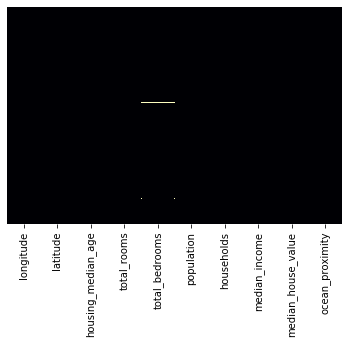

In [13]:
# To check presence of missing values or null values 
# Missing values - Visual EDA 
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'magma')

 - Yellow stripe depicts missing values in total_bedroom. A total of 207 values are missing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12235af28>,
      dtype=object)

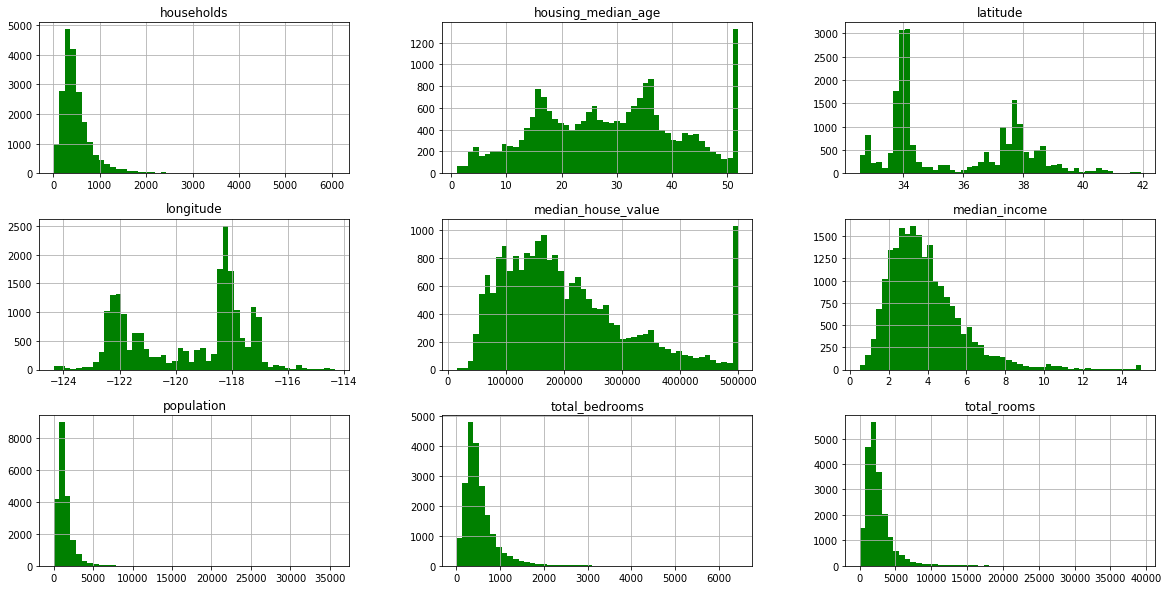

In [14]:
# Plotting Histograms
df.hist(bins=50,figsize=(20, 10), color = 'green')

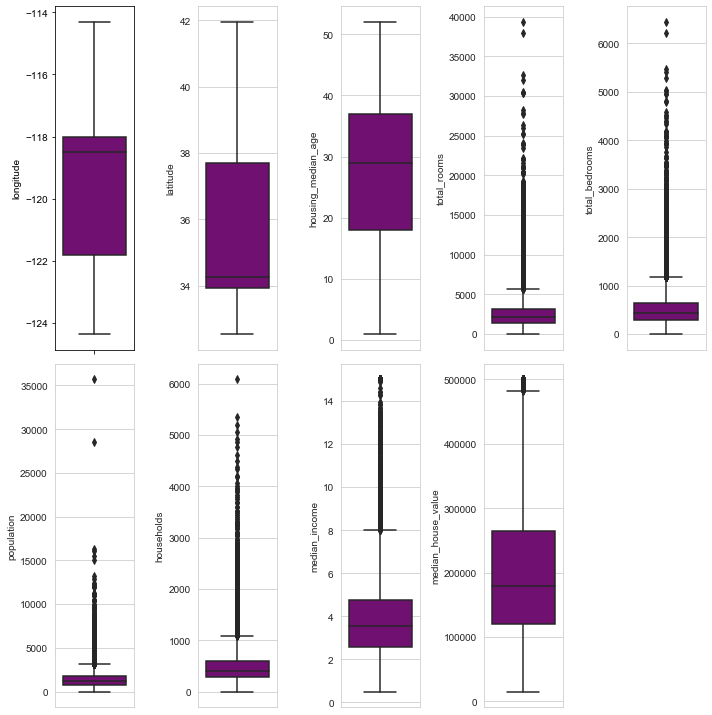

In [15]:
## BoxPlot
l = df_numerical.columns.values
number_of_columns=5 # divided in two rows
number_of_rows = 2
plt.figure(figsize=(10,15))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid') ## added drids in the background
    sns.boxplot(df_numerical[l[i]],color='purple',orient='v')
    plt.tight_layout()

- Apart from other information boxplots provide a good visualization of outliers. 

[]

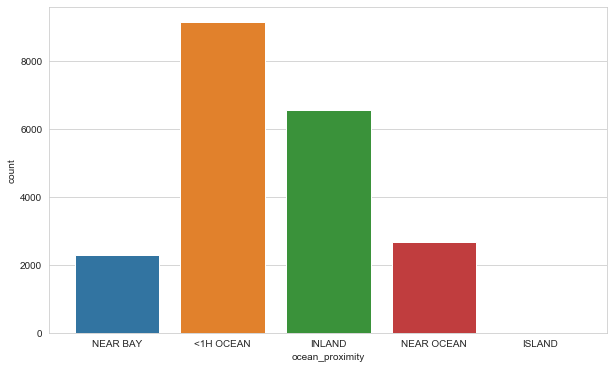

In [16]:
#barplot on ocean_proximity categories
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

## Missing Values

The 'info' function clearly shows that the varibale 'total_bedrooms' have missing values (a total of 207).
To proceed further with the data, one has to take care of these missing values.
In this data set only one variable has the missing values, which can be fixed either by 
(i) removing the rows with the missing values or  (ii) filling the missing values with the mean value. 
As the missing values are approx 1% of the total values, we can move further with option one i.e removing the rows with the missing values. Another importnt point to note the presence of outliers in this variable. If we look at the box plot this variable has many outliers, in this scenario, filling missing values with mean is not appropriate. 

In [17]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
#statistics of missing values column
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

Removing all the rows with missing values

In [19]:
df1 = df.dropna() # df1 is new data frame with removed missing values. This will be used for further analysis.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
